In [1]:
%pip install pandas seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     -------                               61.4/293.3 kB 469.7 kB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


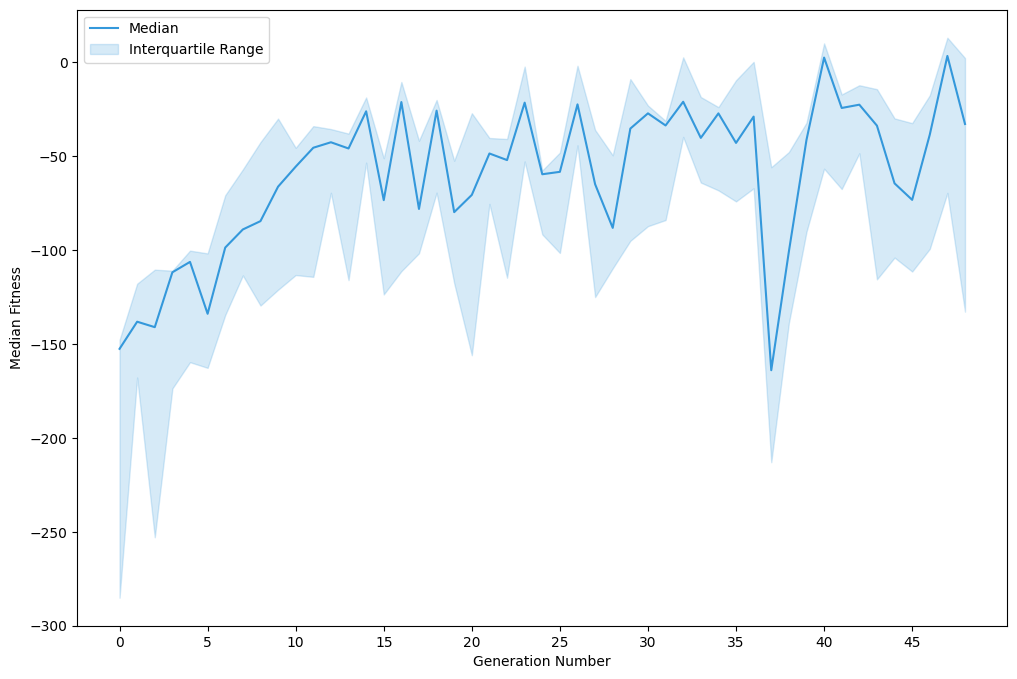

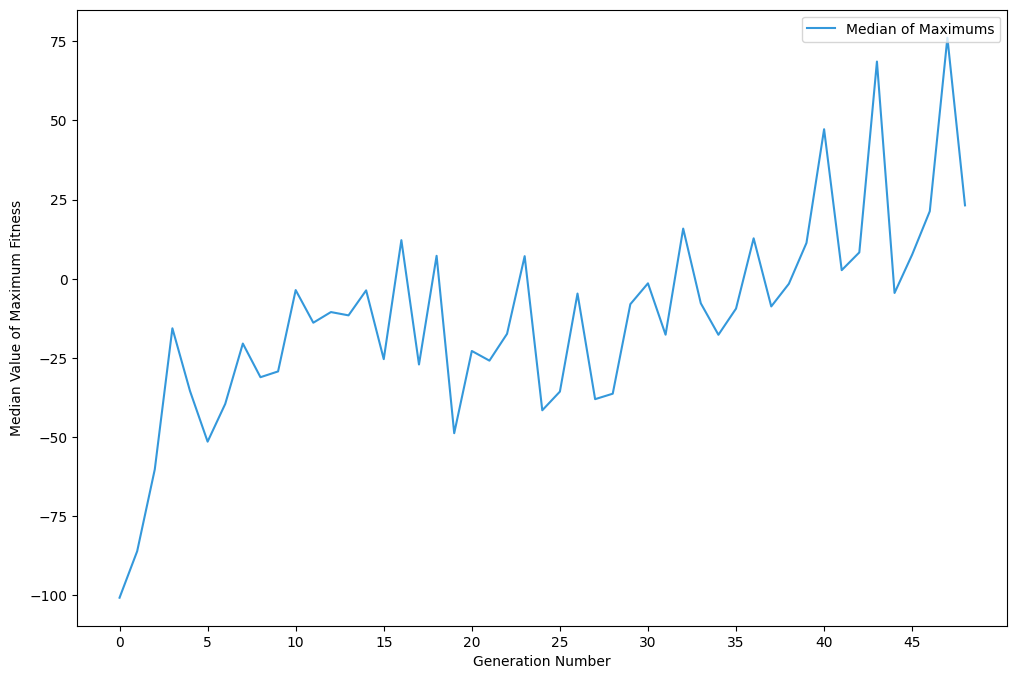

In [2]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def gather_fitness_csv_files(directory: Path, filename_prefix: str = "fitnesses"):
    file_list = [directory / file for file in os.listdir(directory) if file.startswith(filename_prefix)]
    file_list.sort()
    return file_list

def plot_medians(directory: Path):
    fitness_files = gather_fitness_csv_files(directory)
    fitness_data = [pd.read_csv(file, delimiter='\t', lineterminator='\n') for file in fitness_files]
    merged_fitness_data = pd.concat(fitness_data, axis=1)

    median_values = merged_fitness_data.median(axis=1)
    quartile_25, quartile_75 = merged_fitness_data.quantile(0.25, axis=1), merged_fitness_data.quantile(0.75, axis=1)

    plt.figure(figsize=(12, 8))
    plt.plot(median_values, color="#3498db", label="Median")
    plt.fill_between(quartile_25.index, quartile_25, quartile_75, color="#3498db", alpha=0.2, label="Interquartile Range")
    plt.xlabel('Generation Number')
    plt.ylabel('Median Fitness')
    plt.legend(loc="upper left")
    plt.xticks(np.arange(0, len(median_values.index) + 1, 5))
    plt.show()


def plot_median_of_max(directory: Path):
    fitness_files = gather_fitness_csv_files(directory)
    max_values = [pd.read_csv(file, delimiter='\t', lineterminator='\n').max(axis=1) for file in fitness_files]
    median_of_max = pd.concat(max_values, axis=1).median(axis=1)

    plt.figure(figsize=(12, 8))
    plt.plot(median_of_max, color="#3498db", label="Median of Maximums")
    plt.xlabel('Generation Number')
    plt.ylabel('Median Value of Maximum Fitness')
    plt.legend(loc="upper right")
    plt.xticks(np.arange(0, len(median_of_max.index) + 1, 5))
    plt.show()

elite_results_directory = Path("/home/rweis/EA-group-8/")

plot_medians(elite_results_directory)
plot_median_of_max(elite_results_directory)


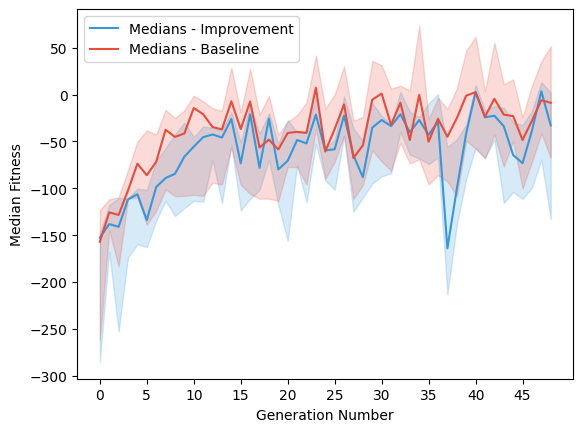

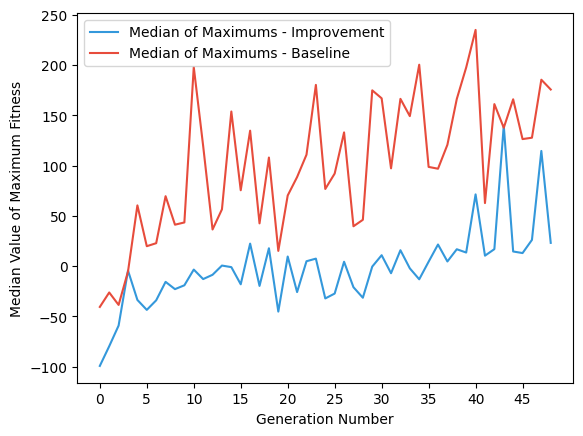

In [3]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def gather_fitness_csv_files(directory: Path, filename_prefix: str = "fitnesses"):
    file_list = [directory / file for file in os.listdir(directory) if file.startswith(filename_prefix)]
    file_list.sort()
    return file_list

def plot_data(directory1: Path, directory2: Path, mode: str):
    fitness_files1 = gather_fitness_csv_files(directory1)
    fitness_files2 = gather_fitness_csv_files(directory2)
    
    if mode == 'Medians':
        data_func = pd.DataFrame.median
        ylabel = 'Median Fitness'
    elif mode == 'Median of Maximums':
        data_func = pd.DataFrame.max
        ylabel = 'Median Value of Maximum Fitness'
    else:
        raise ValueError("Invalid mode. Choose either 'medians' or 'median_of_max'.")

    fitness_data1 = [pd.read_csv(file, delimiter='\t', lineterminator='\n') for file in fitness_files1]
    fitness_data2 = [pd.read_csv(file, delimiter='\t', lineterminator='\n') for file in fitness_files2]
    
    result_data1 = data_func(pd.concat(fitness_data1, axis=1), axis=1)
    result_data2 = data_func(pd.concat(fitness_data2, axis=1), axis=1)

    # plt.figure(figsize=(8, 6))
    plt.plot(result_data1, color="#3498db", label=f"{mode} - Improvement")
    plt.plot(result_data2, color="#e74c3c", label=f"{mode} - Baseline")
    if mode == 'Medians':
        quartile_25_1, quartile_75_1 = pd.concat(fitness_data1, axis=1).quantile(0.25, axis=1), pd.concat(fitness_data1, axis=1).quantile(0.75, axis=1)
        quartile_25_2, quartile_75_2 = pd.concat(fitness_data2, axis=1).quantile(0.25, axis=1), pd.concat(fitness_data2, axis=1).quantile(0.75, axis=1)
        plt.fill_between(quartile_25_1.index, quartile_25_1, quartile_75_1, color="#3498db", alpha=0.2)
        plt.fill_between(quartile_25_2.index, quartile_25_2, quartile_75_2, color="#e74c3c", alpha=0.2)
    plt.xlabel('Generation Number')
    plt.ylabel(ylabel)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(0, len(result_data1.index) + 1, 5))
    plt.savefig(f'{mode}_plot.png', dpi=300)
    plt.show()

elite_results_directory = Path("/home/rweis/EA-group-8/")
baseline_results_directory = Path("/home/rweis/EA-group-8/Baseline/")

plot_data(elite_results_directory, baseline_results_directory, 'Medians')
plot_data(elite_results_directory, baseline_results_directory, 'Median of Maximums')
